In [23]:
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import numpy as np

In [24]:
from sklearn.datasets import load_iris

In [25]:
iris=load_iris()

In [26]:
X=iris.data
y=iris.target

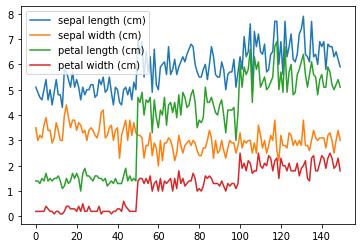

In [27]:
plt.plot(X)
plt.legend(iris.feature_names)
#on peut voir sur le graphique ci-dessous que les mesures varient peu (orange) ou pas mal (vert)

In [28]:
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [32]:
#1er transformer avec le choix d'un seuil de variance au dessous duquel la variable n'est pas considérée comme variant assez
selector=VarianceThreshold(threshold=0.2)
Xnew=selector.fit_transform(X)
selector.get_support()

array([ True, False,  True,  True])

In [35]:
nom=np.array(iris.feature_names)[selector.get_support()]

In [37]:
nom

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

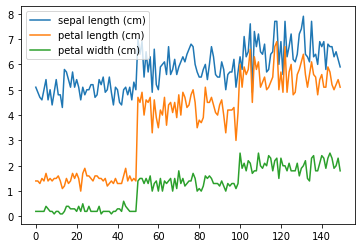

In [36]:
plt.plot(Xnew)
plt.legend(nom)

In [38]:
#sélection de variables avec les tests de dépendances
from sklearn.feature_selection import SelectKBest, chi2

In [39]:
#plus le nombre premier tableau est élevé plus la dépendance de y à cette variable est importante
chi2(X,y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [44]:
#chosira les k var les plus dépendantes en fonction du test du chi2
selector2=SelectKBest(chi2,k=2)
X2=selector2.fit_transform(X,y)
selector2.get_support()

array([False, False,  True,  True])

In [45]:
nom2=np.array(iris.feature_names)[selector2.get_support()]

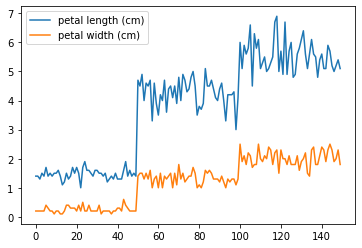

In [60]:
plt.plot(X2)
plt.legend(nom2)

In [48]:
#nouvelle technique : pré-entrainer un estimateur et examiner ses coef pour voir quelles sont les variables importantes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [62]:
selector3=SelectFromModel(SGDClassifier(random_state=0),threshold='mean')
X3=selector3.fit_transform(X,y)
nom3=np.array(iris.feature_names)[selector3.get_support()]

In [63]:
#cette matrice est la matrice qui permet de passer de X à y lors du SGDClassifier X*theta=y
selector3.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

In [64]:
selector3.estimator_.coef_.mean(axis=0)

array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])

In [65]:
#c'est le seuil de notre SelectFromModel ; toutes les moyennes de chaque var au dessus sont sélectionnées;
#sinon non, ici donc seuls les deux dernières le sont 37.87734374,  19.83872585
selector3.estimator_.coef_.mean(axis=0).mean()

-0.9721175565229512

In [66]:
nom3

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

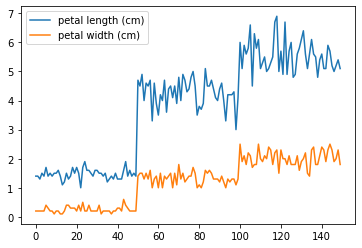

In [67]:
plt.plot(X3)
plt.legend(nom3)

In [68]:
#RFE récursive feature elmination càad qu'on entraine un estimateur, 
#on élimine la var non significative puis on recommence avec ce nouveau modèle ...
#RFECV IDEM AVEC CROSS VALIDATION
from sklearn.feature_selection import RFE,RFECV

In [86]:
#step = nombre de var à éliminer à chaque itération
#min_features_to_select combien min de var on veut avoir à la fin 

selector4=RFECV(SGDClassifier(random_state=0), step=1,min_features_to_select=2,cv=5)
selector4.fit(X,y)
selector4.ranking_

array([2, 1, 1, 1])

In [87]:
#on observe le classement puis le score qui au fur et à mesure des éliminations de variables.
selector4.grid_scores_

array([0.8       , 0.84666667, 0.77333333])

In [88]:
nom4=np.array(iris.feature_names)[selector4.get_support()]

In [89]:
nom4

array(['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

In [105]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [106]:
X4=X[0:,1:]

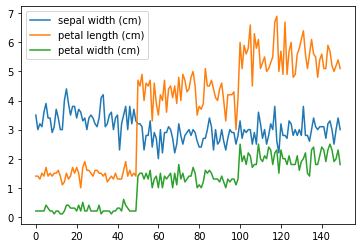

In [108]:
plt.plot(X4)
plt.legend(nom4)